# Comparing chlorophyll data from different sensors in Great Lakes
> Updated August 2023 <br/>

Several and multiple generations of ocean color sensors have been launched since 1997 to provide continuous global ocean color data. The sensors have differences in design and calibration, and different algorithms may be applied to generate chlorophyll values. Consequently, chlorophyll-a values can vary among the sensors during periods where measurements overlap. 

While we are unable to compare measurements of the period of overlap as two data products have mutually exclusive temporal datasets, we will plot the continuous time series to visually examine the difference.  

To examine this phenomenon, we will download and plot time-series of chlorophyll_a concentrations from various sensors from 1997 to the present and see how the measurements compare during periods of overlap. We will use data from the Seawifs (1997-2010), MODIS Aqua (2002-present) and VIIRS SNPP (2012-present) missions.



### Objective

This tutorial will demonstrate how to plot a continous time series using chlorophyll measurements from two sensors.  

### The tutorial demonstrates the following techniques
-   Downloading and saving a netcdf file from CoastWatch ERDDAP data server
-   Accessing and examining satellite data and metadata
-   Performing data wrangling including grouping, averaging  (daily to monthly), reformatting dates, etc.
-   Visualizing data on a map
-   Plotting two cholorphyll time series from the two sensors

### Datasets used

- Color Producing Agent (CPA) Chlorophyll daily data from MODIS (2002-2017) 
- VIIRS SNPP (2012-present)
- Chlorophyll a from VIIRS (2021-Present) ?


## Load Python modules

In [2]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import warnings
warnings.filterwarnings('ignore')

## Download Lake Erie dailly MODIS data

We will download chlorophyll daily data from MODIS sensor from CoastWatch ERDDAP data server.  
(Dataset ID: **LE_CHL_MODIS_Daily**)

You should always examine the dataset in ERDDAP to check the date range, names of the variables and dataset ID, to make sure your griddap calls are correct.

CoastWatch MODIS Chlorophyll data page : 
https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.html



### Review of the ERDDAP data request URL
For our first exercise, we will download MODIS choloraphyll data with the following conditions:
* dates between August 2002 - August 2017  


* bounding coordinates with latitudes (41.005 to 42.995 ) and longitudes (-83.495 to -78.505) degrees respectively.

__The ERDDAP data request URL for this data subset is presented below.__ 

```
https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll%5B(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)%5D%5B(41.0051550293714):1:(42.9950003885447)%5D%5B(-83.4950003885448):1:(-78.505388156246)%5D
```

__The following table shows the component parts of the ERDDAP data request URL.__  

| Name   | Value| Description |
| ---:        |    :----   |          :--- |
| **base_url**    |    https://coastwatch.glerl.noaa.gov/erddap/griddap/  | ERDDAP URL for gridded datasets
| **datasetID** | LE_CHL_MODIS_Daily   | Unique ID for dataset from PolarWatch ERDDAP
| **file_type**  | .nc        | format of file to download (netCDF) |
| **query_start**   | ?        | Details of the query follow the ?  
| **variable_name**   | chlorophyll        | Variable from the dataset 
| **date_range**   | [(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)]      |  Temporal range (2021-01-01)
| **spatial_range**   | [(41.0051550293714):1:(42.9950003885447)][(-83.4950003885448):1:(-78.505388156246)]  |  Lat and Lon ranges 


In [4]:
# Set ERDDAP URL 
url='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll%5B(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)%5D%5B(41.0051550293714):1:(42.9950003885447)%5D%5B(-83.4950003885448):1:(-78.505388156246)%5D'

# Send data request to the ERDDAP URL and save to a file
urllib.request.urlretrieve(url, "e_chl_modis.nc")

('e_chl_modis.nc', <http.client.HTTPMessage at 0x28105a510>)

In [5]:
# Load the data using xarray
e_m_ds = xr.open_dataset('e_chl_modis.nc',decode_cf=False)

## Examine the downloaded data and metadata

Once the data are downloaded, it is important to examine the dataset structure, dimensions, coordinates, and variables  .

In [ ]:
# Examine coordinates of the data
e_m_ds.coords

In [ ]:
# Examine time variable
e_m_ds.time

In [ ]:
# Examine data variables
e_m_ds.data_vars

In [ ]:
# Examine the variable:chlorophyll shape (dimension)
# Based on e_m_ds.coords, the dim corresponds to (time, latitude, longitude)
e_m_ds.chlorophyll.shape

## Reformat and clean data for data analysis

Once examined, the data may be reformatted and aggregated into formats that are convenient for further data analysis.
-  Reformat the datetime
-  Treat missing data (fill value)

In [6]:
# Create datetime array from time and time unit provided from the data
e_m_dates=nc.num2date(e_m_ds.time,e_m_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
# Examine the results
e_m_dates

array([real_datetime(2002, 8, 7, 19, 5),
       real_datetime(2002, 8, 8, 18, 10),
       real_datetime(2002, 8, 9, 18, 55),
       real_datetime(2002, 8, 10, 18, 0),
       real_datetime(2002, 8, 17, 18, 5),
       real_datetime(2002, 8, 20, 18, 35),
       real_datetime(2002, 8, 25, 18, 55),
       real_datetime(2002, 8, 27, 18, 40),
       real_datetime(2002, 8, 29, 18, 30),
       real_datetime(2002, 8, 31, 18, 15),
       real_datetime(2002, 9, 1, 19, 0),
       real_datetime(2002, 9, 5, 18, 35),
       real_datetime(2002, 9, 7, 18, 25),
       real_datetime(2002, 9, 8, 19, 5),
       real_datetime(2002, 9, 9, 18, 10),
       real_datetime(2002, 9, 16, 18, 15),
       real_datetime(2002, 9, 17, 19, 0),
       real_datetime(2002, 9, 21, 18, 35),
       real_datetime(2002, 9, 28, 18, 40),
       real_datetime(2002, 9, 30, 18, 30),
       real_datetime(2002, 10, 6, 17, 50),
       real_datetime(2002, 10, 14, 18, 40),
       real_datetime(2003, 6, 2, 18, 45),
       real_datetime(2003

In [7]:
# Examine _FillValue from the metadata
e_m_ds.chlorophyll.attrs['_FillValue']

-999.0

In [8]:
# In chlorophyll variable, replace -999 with nan
nan_e_m_ds_chlorophyll = e_m_ds.chlorophyll.where(e_m_ds.chlorophyll.values != e_m_ds.chlorophyll.attrs['_FillValue'])

# Examine the result
nan_e_m_ds_chlorophyll

<xarray.DataArray 'chlorophyll' (time: 506, latitude: 200, longitude: 500)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) float64 1.029e+09 1.029e+09 ... 1.509e+09 1.509e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.04 ... 42.98 42.99 43.0
  * longitude  (longitude) float64 -83.5 -83.49 -83.48 ... -78.53 -78.52 -78.51
Attributes:
    _FillValue:       -999.0
    colorBarMaximum:  30.0
    colorBarMinimum:  1.0
    grid_mapping:     crs
    ioos_category:    Ocean Color
    long_name:        Chlorophyll-a, Aqua MODIS, EXPERIMENTAL
    standard_name:    concentration_of_chlorophyll_in_sea_water
    units:            ug/L


##  Compute August 2009 monthly mean of chlorophyll of Lake Erie

The dataset include daily chlorophyll values from 2009 to 2017.  

To compute August 2009 monthly mean, we will first subset the data of August 2009 and compute the monthly mean of each grid within Lake Erie.

In [24]:
# Create list of string contains 'year month day hours minutes seconds' 
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

mn, yr = '08' , '2009'
i_list = []

for n, d in enumerate(d_list):
    d_t = d.split()
    if d_t[0] == yr and d_t[1] == mn:
        # print( n, d_t)
        i_list.append(n)  # get all index of data for yr and mn
    
    #print(n, d)
#print(i_list)


chl_avg_img = nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]].mean(axis=0)
#print(chl_avg_img.shape)

## Plot Lake Erie August 2009 monthly mean of chlorophyll

First, we will set parameters needed for plotting and creating color map.  Then we will create a plot of monthly mean chlorophyll values.

In [16]:
# Compute number of colors 
levs = np.arange(np.nanmin(chl_avg_img), np.nanmax(chl_avg_img), 0.3)

# Examine number of colors needed for the plot 
len(levs)

# Set parameters for color map
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]

# Set Colormap segments
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

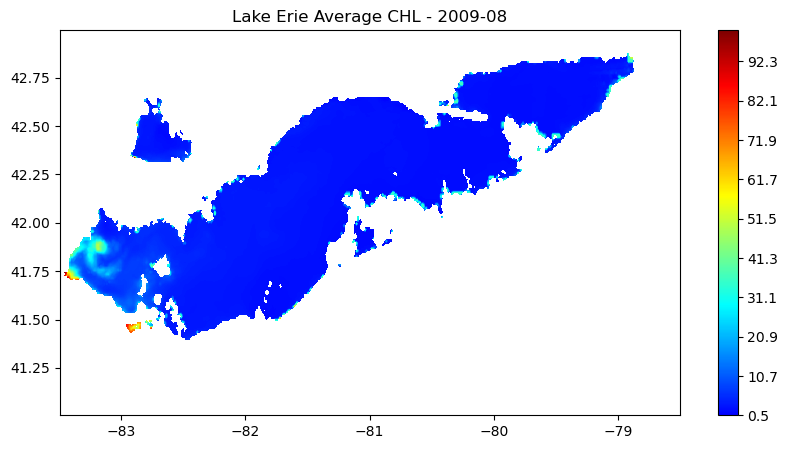

In [17]:
# Set plot size
plt.subplots(figsize=(10, 5))

# Plot monthly chlorophyll with longitudes and latitudes
plt.contourf(e_m_ds.longitude, e_m_ds.latitude, chl_avg_img, levs,cmap=cm)

# Print colorbar with color scale
plt.colorbar()

# Set plot title
plt.title("Lake Erie Average CHL - " + yr + '-' + mn)
plt.show()

## Compute chlorophyll monthly mean from 2002 to 2017

In the next exercise, we will compute montly means from 2002 to 2017 to examine the time series of monthly values of multiple years.  

The previous exercise involves computing mean values of chlorophyll for each grid cell.  We will now compute monthly mean across the grids within the Lake Erie.

In [57]:
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

#print(min(d_list))
#print(max(d_list))
m_yr_list = []
[ m_yr_list.append(str(dt.year)) for dt in e_m_dates if str(dt.year) not in m_yr_list ]

print(m_yr_list)
print(len(m_yr_list))

mn_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
m_chl_avg_list = []
for yr in m_yr_list:
    for mn in mn_list:
        
        i_list = []
        for n, d in enumerate(d_list):
            d_t = d.split()
            #print(type(yr), type(mn), d_t)
            if d_t[0] == yr and d_t[1] == mn:
                #print( n, d_t)
                i_list.append(n)  # get all index of data for yr and mn
    
        #print(i_list, 'aaa')

        if i_list:
            #print('bbb')
            # axis=0 is time line
            m_chl_avg = np.nanmean(nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]],axis=(0,1,2))
            #print(i_list)
            #print('ccc', chl_avg)
        else:
            m_chl_avg = np.NAN
        #print(yr, mn, chl_avg)
        
        m_chl_avg_list.append(m_chl_avg)  # add each month mean data into list
print("Length: ", len(m_chl_avg_list))
print(m_chl_avg_list)

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
16
Length:  192
[nan, nan, nan, nan, nan, nan, nan, 5.435731696799938, 5.390267233342085, 8.081265781572409, nan, nan, nan, nan, nan, nan, nan, 6.781491128619841, 6.109469974086832, 4.314376310517935, 6.79798886383254, 7.093404713878546, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.368433526104296, 7.64127887019175, 10.885647119544341, nan, nan, nan, nan, nan, nan, nan, 5.840624163588643, 5.249259500793706, 4.616988228955723, 7.096526864254263, 4.819230418185895, nan, nan, nan, nan, nan, nan, nan, 4.510100122676393, 4.086877241390418, 8.282441959350821, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.047208513833891, 4.158334577045406, 5.306521407370655, 4.870477621191157, nan, nan, nan, nan, nan, nan, nan, nan, 4.399793136125678, 4.948825492811119, 6.928067277764852, 7.537945121660116, 10.463871652015316, nan, nan, nan, nan, nan, nan, nan, 5.468607769352359

In [62]:
# sunny

# Replace fill values (-999) with nan
newdat = e_m_ds.chlorophyll.where(e_m_ds.chlorophyll != e_m_ds.chlorophyll.attrs['_FillValue'])

# Convert numeric time values to datetime objects
e_m_dates = nc.num2date(newdat.time.values, newdat.time.units, 
                              only_use_cftime_datetimes=False, only_use_python_datetimes=True)
newdat['time'] = e_m_dates

# Aggregate the chlorophyll as monthly average
monthly_mean = newdat.resample(time='1M').mean(dim=['time', 'latitude', 'longitude'])


[real_datetime(2002, 8, 7, 19, 5) real_datetime(2002, 8, 8, 18, 10)
 real_datetime(2002, 8, 9, 18, 55) real_datetime(2002, 8, 10, 18, 0)
 real_datetime(2002, 8, 17, 18, 5) real_datetime(2002, 8, 20, 18, 35)
 real_datetime(2002, 8, 25, 18, 55) real_datetime(2002, 8, 27, 18, 40)
 real_datetime(2002, 8, 29, 18, 30) real_datetime(2002, 8, 31, 18, 15)
 real_datetime(2002, 9, 1, 19, 0) real_datetime(2002, 9, 5, 18, 35)
 real_datetime(2002, 9, 7, 18, 25) real_datetime(2002, 9, 8, 19, 5)
 real_datetime(2002, 9, 9, 18, 10) real_datetime(2002, 9, 16, 18, 15)
 real_datetime(2002, 9, 17, 19, 0) real_datetime(2002, 9, 21, 18, 35)
 real_datetime(2002, 9, 28, 18, 40) real_datetime(2002, 9, 30, 18, 30)
 real_datetime(2002, 10, 6, 17, 50) real_datetime(2002, 10, 14, 18, 40)
 real_datetime(2003, 6, 2, 18, 45) real_datetime(2003, 6, 20, 18, 35)
 real_datetime(2003, 6, 27, 18, 40) real_datetime(2003, 7, 1, 18, 15)
 real_datetime(2003, 7, 2, 19, 0) real_datetime(2003, 7, 13, 18, 40)
 real_datetime(2003, 7,

In [46]:
monthly_mean[0]

<xarray.DataArray 'chlorophyll' ()>
array(5.88699957)
Coordinates:
    time     datetime64[ns] 2002-08-31
Attributes:
    _FillValue:       -999.0
    colorBarMaximum:  30.0
    colorBarMinimum:  1.0
    grid_mapping:     crs
    ioos_category:    Ocean Color
    long_name:        Chlorophyll-a, Aqua MODIS, EXPERIMENTAL
    standard_name:    concentration_of_chlorophyll_in_sea_water
    units:            ug/L

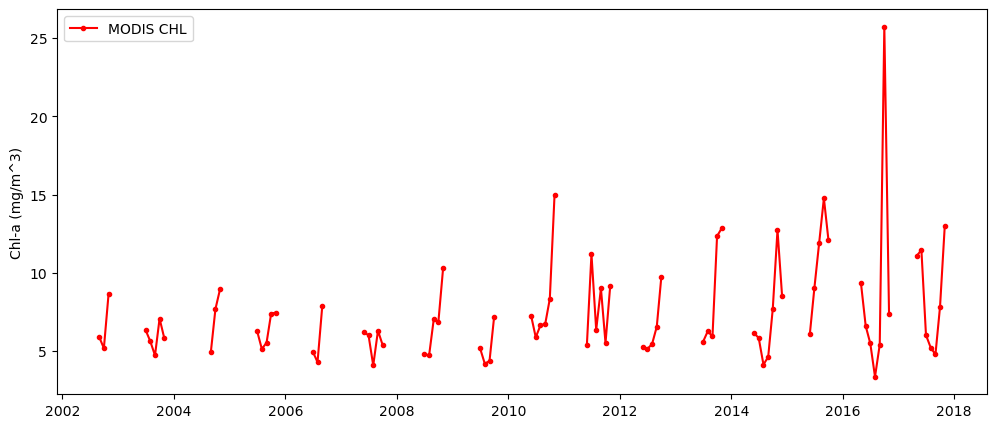

In [47]:
plt.figure(figsize=(12,5)) 
plt.plot(monthly_mean.time, monthly_mean, label='MODIS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

## Plot MODIS montly mean chlorophyll values from 2002 to 2017

The time series plot shows Lake Erie's average monthly chlorophyll values from MODIS for each month between 2002 and 2017.

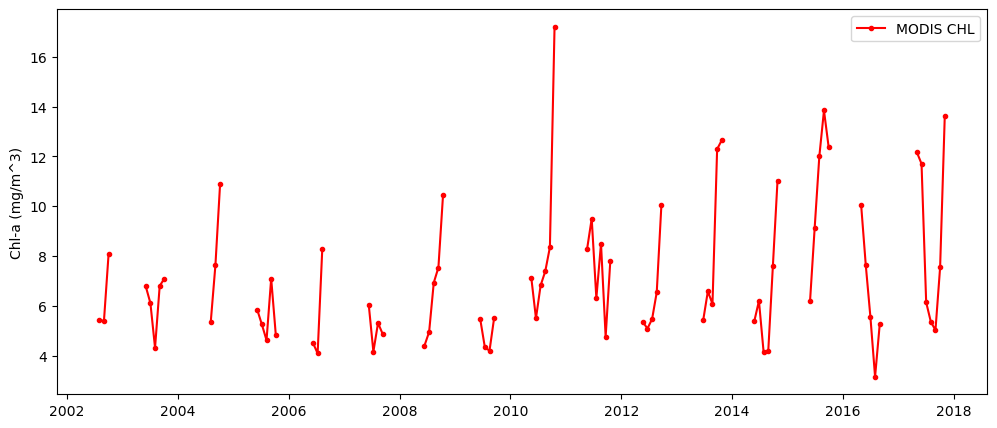

In [48]:
x = np.linspace(2002, 2018,num=192)   # contains data from 2002 to 2017 (not 2018)
plt.figure(figsize=(12,5)) 
plt.plot(x,m_chl_avg_list,label='MODIS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

In [56]:
m_chl_avg_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.435731696799938,
 5.390267233342085,
 8.081265781572409,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.781491128619841,
 6.109469974086832,
 4.314376310517935,
 6.79798886383254,
 7.093404713878546,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.368433526104296,
 7.64127887019175,
 10.885647119544341,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.840624163588643,
 5.249259500793706,
 4.616988228955723,
 7.096526864254263,
 4.819230418185895,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.510100122676393,
 4.086877241390418,
 8.282441959350821,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.047208513833891,
 4.158334577045406,
 5.306521407370655,
 4.870477621191157,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.399793136125678,
 4.948825492811119,
 6.928067277764852,
 7.537945121660116,
 10.463871652015316,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 5.468607769352359,
 4.331433124523354,
 4.19491169121446,
 5.519118007367

## Get Lake Erie monthly chlorophyll data from different sensor, VIIRS

The VIIRS satellite dataset includes monthly chlorophyll values from 2018 to present. We will download and reformat the data to compare with the previously computed monthly chlorophyll data of the Lake Erie.

This VIIRS Dataset is already monthly chlorphyll values, thus no computation of monthly mean is necessarily. 
We will follow the similar steps as the previous sections of this exercise to make comparison of data from two sensors, MODIS and VIIRS.



In [15]:
# Set the ERDDAP data request URL
url2='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_VIIRS_Monthly_Avg.nc?Chlorophyll%5B(2018-05-15T12:00:00Z):1:(2022-09-15T12:00:00Z)%5D%5B(41.2690208353804):1:(43.017997272827)%5D%5B(-83.6574899492178):1:(-78.4429490894234)%5D'

# Send the data request to ERDDAP
urllib.request.urlretrieve(url2, "e_viirs_chl.nc")

('e_viirs_chl.nc', <http.client.HTTPMessage at 0x125405110>)

In [21]:
# Open the dataset using xarray
e_v_ds = xr.open_dataset('e_viirs_chl.nc',decode_cf=False)

In [22]:
# Examine metadata of the data set
print(e_v_ds)

<xarray.Dataset>
Dimensions:      (time: 53, latitude: 271, longitude: 806)
Coordinates:
  * time         (time) float64 1.526e+09 1.529e+09 ... 1.661e+09 1.663e+09
  * latitude     (latitude) float64 41.27 41.28 41.28 ... 43.01 43.01 43.02
  * longitude    (longitude) float64 -83.66 -83.65 -83.64 ... -78.45 -78.44
Data variables:
    Chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/35)
    cdm_data_type:                  Grid
    colorBarMaximum:                30.0
    colorBarMinimum:                1.0
    colorBarScale:                  Log
    Conventions:                    CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:            -78.4429490894234
    ...                             ...
    summary:                        Color Producing Agent (CPA) Chlorophyll, ...
    testOutOfDate:                  now-58days
    time_coverage_end:              2022-09-15T12:00:00Z
    time_coverage_start:            2018-05-15T12:00:00Z
    title:                     

In [23]:
nan_e_v_ds_chlorophyll = e_v_ds.Chlorophyll.where(e_v_ds.Chlorophyll.values != e_v_ds.Chlorophyll.attrs['_FillValue'])

v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll,axis=(1,2))
print(v_chl_avg)
print(len(v_chl_avg))

[ 7.387662   7.130833   6.8531957  7.067971  10.981218   9.158773
 13.29338    9.700653  13.87522   37.8129    17.29175   14.630282
 10.530294   8.1118765  6.0679684  7.7413135  8.563966  18.578035
 13.02914    9.297082  13.149483  14.124588  12.059988  12.409704
  8.531175   6.5784163  4.954806   6.5634985  7.719488  11.749591
 14.757857  16.201027  10.846249  11.817226  15.175478   9.953331
  9.3959055  5.0962305  4.7101736  6.511713  10.5009165  8.693387
 10.755935  25.140661  14.031336  17.865644  16.326204   8.967016
  8.982615   4.526909   4.958596   6.2696676  6.026227 ]
53


In [24]:
# Reformat the data 
e_v_dates=nc.num2date(e_v_ds.time,e_v_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
e_v_dates 


array([real_datetime(2018, 5, 15, 12, 0),
       real_datetime(2018, 6, 15, 12, 0),
       real_datetime(2018, 7, 15, 12, 0),
       real_datetime(2018, 8, 15, 12, 0),
       real_datetime(2018, 9, 15, 12, 0),
       real_datetime(2018, 10, 15, 12, 0),
       real_datetime(2018, 11, 15, 12, 0),
       real_datetime(2018, 12, 15, 12, 0),
       real_datetime(2019, 1, 15, 12, 0),
       real_datetime(2019, 2, 15, 12, 0),
       real_datetime(2019, 3, 15, 12, 0),
       real_datetime(2019, 4, 15, 12, 0),
       real_datetime(2019, 5, 15, 12, 0),
       real_datetime(2019, 6, 15, 12, 0),
       real_datetime(2019, 7, 15, 12, 0),
       real_datetime(2019, 8, 15, 12, 0),
       real_datetime(2019, 9, 15, 12, 0),
       real_datetime(2019, 10, 15, 12, 0),
       real_datetime(2019, 11, 15, 12, 0),
       real_datetime(2019, 12, 15, 12, 0),
       real_datetime(2020, 1, 15, 12, 0),
       real_datetime(2020, 2, 15, 12, 0),
       real_datetime(2020, 3, 15, 12, 0),
       real_datetime(2020, 4

In [25]:
# Take the mean of values
v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll.values,axis=(1,2))
v_chl_avg

array([ 7.387662 ,  7.130833 ,  6.8531957,  7.067971 , 10.981218 ,
        9.158773 , 13.29338  ,  9.700653 , 13.87522  , 37.8129   ,
       17.29175  , 14.630282 , 10.530294 ,  8.1118765,  6.0679684,
        7.7413135,  8.563966 , 18.578035 , 13.02914  ,  9.297082 ,
       13.149483 , 14.124588 , 12.059988 , 12.409704 ,  8.531175 ,
        6.5784163,  4.954806 ,  6.5634985,  7.719488 , 11.749591 ,
       14.757857 , 16.201027 , 10.846249 , 11.817226 , 15.175478 ,
        9.953331 ,  9.3959055,  5.0962305,  4.7101736,  6.511713 ,
       10.5009165,  8.693387 , 10.755935 , 25.140661 , 14.031336 ,
       17.865644 , 16.326204 ,  8.967016 ,  8.982615 ,  4.526909 ,
        4.958596 ,  6.2696676,  6.026227 ], dtype=float32)

## Plot VIIRS montly mean chlorophyll values from 2018 to 2022

The time series plot shows Lake Erie's average monthly chlorophyll values from MODIS for each month between 2018 and 2022.

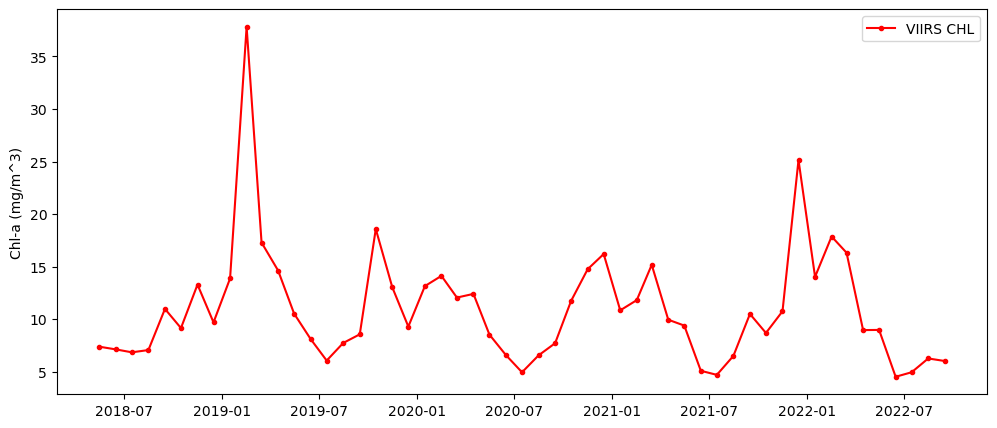

In [26]:
# Set plot size
plt.figure(figsize=(12,5)) 

# Plot 
plt.plot(e_v_dates,v_chl_avg,label='VIIRS CHL',c='red',marker='.',linestyle='-')

# Add label
plt.ylabel('Chl-a (mg/m^3)')

# Add legend
plt.legend()

In [ ]:
# Combine the two sensor values and plot time series from 2002 to 2022

